## TimeSeries(시계열) 데이터 기초
- 데이터 전처리, 간단한 시각화 방법 정리
- 실습환경(LMS)와는 다른 데이터로 적용해보기(실제 주가 데이터)

### 01 데이터 불러오기, 전처리
- 교육과정과 다른 데이터 사용(yahoo finance)
- 한국지수, 미국지수, 미국 내 특정 주식 종목, ETF 등을 불러와보자(괄호 안은 티커 명임)
  - 한국지수 : 코스피(^KS11), 코스닥(^KQ11)
  - 미국지수 : S&P500(^GSPC), 나스닥(^IXIC), 다우존스(^DJI)
  - 미국 내 종목 : 리얼티 인컴(O), 화이자(PFE)
  - 미국 ETF : QQQ(QQQ), SCHD(QQQ)

In [1]:
!pip install yfinance # yfinance 설치

##### 관련 라이브러리 불러오기

In [2]:
import yfinance as yf # yahoo-finance 불러오기!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # ACF plot, PACF plot 그리는 함수

In [3]:
ticker = yf.Ticker("^KS11") # 코스피지수의 티커 "^KS11" (이건 https://finance.yahoo.com/에서 검색해야 함)

In [4]:
ticker.history(period="") # 과거 주식 불러올 때, history ("1mo", "3mo", "6mo", "1y", "2y", "5y", "max" 등)
# 170일 처럼, "170d"도 가능

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-05-23 00:00:00+09:00,2603.570068,2604.139893,2592.949951,2600.27002,175288,0.0,0.0


##### 코스피 지수만 불러봄!
- ticker.history로 과거 데이터를 불러올 수 있음
- Open(시가), High(최고가), Low(최저가), Close(종가), Volume(거래량), Dividens(배당),    
Stock Splits(주식분할,flag임 주식이 1:2로 액면분할하면 2.0으로 나타남
- 편의상 Date(날짜), Close(종가) 컬럼만 불러오겠음


In [5]:
df = ticker.history(period="6mo")  # 지난 6개월치
df = df.reset_index()  # Date 열 복구
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-11-25 00:00:00+09:00,2524.110107,2541.760010,2517.979980,2534.340088,564700,0.0,0.0
1,2024-11-26 00:00:00+09:00,2521.389893,2526.620117,2512.209961,2520.360107,441700,0.0,0.0
2,2024-11-27 00:00:00+09:00,2518.820068,2526.320068,2498.320068,2503.060059,414300,0.0,0.0
3,2024-11-28 00:00:00+09:00,2499.689941,2513.629883,2495.639893,2504.669922,342600,0.0,0.0
4,2024-11-29 00:00:00+09:00,2496.929932,2496.929932,2446.959961,2455.909912,384300,0.0,0.0


##### Ticker 재정의하고 원하는 지수, 종목, ETF 다 불러보기
- 이 때는 yf.download() 사용
- Yahoo Finance에서 데이터를 pandas DataFrame으로 불러옴

In [6]:
# import yfinance as yf (앞에서 불렀던 것!)
import time
st = time.time()
df = yf.download(["^KS11","^KQ11","^GSPC","^IXIC","^DJI","O","PFE","QQQ", "SCHD"], period="6mo")
ed = time.time()

print(f'다운로드 시간:{round(ed-st,2)}')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  9 of 9 completed

다운로드 시간:1.05


In [7]:
df.head()

Price           Close                                                  \
Ticker              O        PFE         QQQ       SCHD          ^DJI   
Date                                                                    
2024-11-25  55.842064  25.262453  505.021301  28.975832  44736.570312   
2024-11-26  56.133671  24.876326  507.732880  28.916920  44860.308594   
2024-11-27  56.687717  24.934244  503.735291  28.907101  44722.058594   
2024-11-28        NaN        NaN         NaN        NaN           NaN   
2024-11-29  56.269753  25.301065  508.161530  28.995472  44910.648438   

Price                                                                High  \
Ticker            ^GSPC         ^IXIC       ^KQ11        ^KS11          O   
Date                                                                        
2024-11-25  5987.370117  19054.839844  696.830017  2534.340088  56.104507   
2024-11-26  6021.629883  19174.300781  693.150024  2520.360107  56.221152   
2024-11-27  5998.740234  19060.480469  692.000000  2503.060059  57.144564   
2024-11-28          NaN           NaN  694.390015  2504.669922        NaN   
2024-11-29  6032.379883  19218.169922  678.190002  2455.909912  57.008483   

Price       ...         Open     Volume                                      \
Ticker      ...        ^KS11          O         PFE         QQQ        SCHD   
Date        ...                                                               
2024-11-25  ...  2524.110107  6793300.0  57707600.0  26375200.0  12321500.0   
2024-11-26  ...  2521.389893  3038900.0  33001000.0  26557100.0  11306600.0   
2024-11-27  ...  2518.820068  3016100.0  28242100.0  24957400.0  10547500.0   
2024-11-28  ...  2499.689941        NaN         NaN         NaN         NaN   
2024-11-29  ...  2496.929932  3486200.0  22023000.0  15334000.0   7685300.0   

Price                                                                 
Ticker             ^DJI         ^GSPC         ^IXIC  ^KQ11     ^KS11  
Date                                                                  
2024-11-25  826660000.0  5.633150e+09  7.932980e+09  800.0  564700.0  
2024-11-26  476170000.0  3.835170e+09  6.411770e+09  800.0  441700.0  
2024-11-27  451360000.0  3.363340e+09  5.619090e+09  900.0  414300.0  
2024-11-28          NaN           NaN           NaN  900.0  342600.0  
2024-11-29  319210000.0  2.444420e+09  4.042550e+09  900.0  384300.0  

[5 rows x 45 columns]

##### 편의상 종가 기준으로만 분석하자

In [8]:
close_df = df.loc[:, 'Close'].copy()
close_df.columns.name = None  # 컬럼 위의 MultiIndex 이름 제거
close_df = close_df.dropna().reset_index()
close_df.head() # "^KS11","^KQ11","^GSPC","^IXIC","^DJI","O","PFE","QQQ", "SCHD"

,Date,O,PFE,QQQ,SCHD,^DJI,^GSPC,^IXIC,^KQ11,^KS11
0,2024-11-25,55.842064,25.262453,505.021301,28.975832,44736.570312,5987.370117,19054.839844,696.830017,2534.340088
1,2024-11-26,56.133671,24.876326,507.732880,28.916920,44860.308594,6021.629883,19174.300781,693.150024,2520.360107
2,2024-11-27,56.687717,24.934244,503.735291,28.907101,44722.058594,5998.740234,19060.480469,692.000000,2503.060059
3,2024-11-29,56.269753,25.301065,508.161530,28.995472,44910.648438,6032.379883,19218.169922,678.190002,2455.909912
4,2024-12-02,55.355774,24.924591,513.694336,28.808910,44782.000000,6047.149902,19403.949219,675.840027,2454.479980


In [9]:
ordered_col = ["Date","^KS11","^KQ11","^GSPC","^IXIC","^DJI","O","PFE","QQQ", "SCHD"] # 맨 처음에 불러온 순서
close_df = close_df[ordered_col] # column 재배열
close_df.head()

,Date,^KS11,^KQ11,^GSPC,^IXIC,^DJI,O,PFE,QQQ,SCHD
0,2024-11-25,2534.340088,696.830017,5987.370117,19054.839844,44736.570312,55.842064,25.262453,505.021301,28.975832
1,2024-11-26,2520.360107,693.150024,6021.629883,19174.300781,44860.308594,56.133671,24.876326,507.732880,28.916920
2,2024-11-27,2503.060059,692.000000,5998.740234,19060.480469,44722.058594,56.687717,24.934244,503.735291,28.907101
3,2024-11-29,2455.909912,678.190002,6032.379883,19218.169922,44910.648438,56.269753,25.301065,508.161530,28.995472
4,2024-12-02,2454.479980,675.840027,6047.149902,19403.949219,44782.000000,55.355774,24.924591,513.694336,28.808910


##### Ticker명 대신 '종목명'으로 변경

In [10]:
rename_map = {
    '^KS11': 'KOSPI',
    '^KQ11': 'KOSDAQ',
    '^GSPC': 'S&P500',
    '^IXIC': 'NASDAQ',
    '^DJI': 'DowJones',
    'QQQ': 'QQQ',
    'SCHD': 'SCHD',
    'PFE': 'Pfizer',
    'O': 'RealtyIncome'
}

close_df = close_df.rename(columns=rename_map)
close_df.head()

,Date,KOSPI,KOSDAQ,S&P500,NASDAQ,DowJones,RealtyIncome,Pfizer,QQQ,SCHD
0,2024-11-25,2534.340088,696.830017,5987.370117,19054.839844,44736.570312,55.842064,25.262453,505.021301,28.975832
1,2024-11-26,2520.360107,693.150024,6021.629883,19174.300781,44860.308594,56.133671,24.876326,507.732880,28.916920
2,2024-11-27,2503.060059,692.000000,5998.740234,19060.480469,44722.058594,56.687717,24.934244,503.735291,28.907101
3,2024-11-29,2455.909912,678.190002,6032.379883,19218.169922,44910.648438,56.269753,25.301065,508.161530,28.995472
4,2024-12-02,2454.479980,675.840027,6047.149902,19403.949219,44782.000000,55.355774,24.924591,513.694336,28.808910


### 02 데이터 시각화, 정상성 확인
- 일단 KOSPI 하나만 시각화, 정상성 확인만 해보자.
- 정상성 있는지 점검(종가, raw_data기준)
  - ADF검정 : 귀무가설(정상성 성립X) -> p_value < 0.05, 정상성O
  - KPSS검정 : 귀무가설(정상성 성립O) -> p_value < 0.05, 정상성X

##### KOSPI시각화 해보기

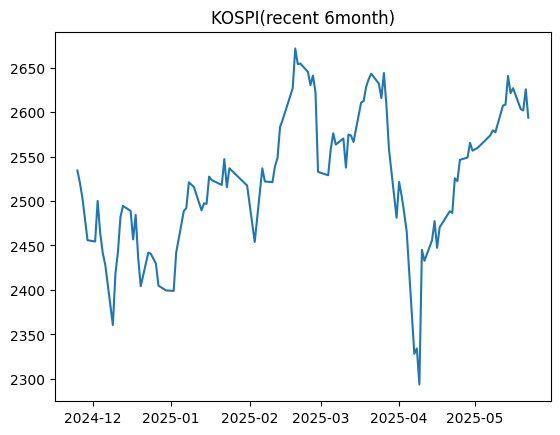

In [11]:
# KOSPI 시각화
plt.plot('Date','KOSPI',data=close_df)
plt.title('KOSPI(recent 6month)')
plt.show()


##### ADF, KPSS 검정 수행하기
- KOSPI만 가지고 테스트 수행(ADF검정)

In [31]:
# ADF 검정 수행
# ADF 검정은 귀무가설(정상성X)
from statsmodels.tsa.stattools import adfuller, kpss
kospiTest = close_df[['Date','KOSPI']]
result = adfuller(kospiTest['KOSPI'])
result

(np.float64(-2.235292509336365),
 np.float64(0.193686496700197),
 0,
 112,
 {'1%': np.float64(-3.4901313156261384),
  '5%': np.float64(-2.8877122815688776),
  '10%': np.float64(-2.5807296460459184)},
 np.float64(975.1139800272546))

In [32]:
print(f'ADF통계량 : {round(result[0],2)}') # ADF통계량(제일 처음 튜플 값)
print(f'P-value : {round(result[1],2)}') # p-value
print(f'usedlag(사용된 지연차 수) : {round(result[2],2)}') # 0이면 : 시계열의 과거 변화값(lagged differences)을 아예 사용하지 않았다는 뜻
print(f'유효관측치 : {result[3]}') # 유효한 관측치 수
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}") # 딕셔너리라 key, value 꺼내야 함 / 유의수준(1%,5%,10% 별 통계량)
print(f'AIC값 : {result[5]}') # AIC 값

ADF통계량 : -2.24
P-value : 0.19
usedlag(사용된 지연차 수) : 0
유효관측치 : 112
Critical Values:
   1%: -3.4901313156261384
   5%: -2.8877122815688776
   10%: -2.5807296460459184
AIC값 : 975.1139800272546


##### KPSS 검정
- 이론적 detail은 brownian-motion까지 다뤄야 하므로 실무나, 본 교육과정에 맞지 않을 듯 하여 자세한 설명은 생략

In [40]:
kpstest = kpss(kospiTest['KOSPI'], regression = 'c') # regression 옵션, c, ct 등이 있음

# regression option에 대한 설명
# "c" : The data is stationary around a constant (default, 기본값).
# "ct" : The data is stationary around a trend.

In [41]:
kpstest

(np.float64(0.4248842209159787),
 np.float64(0.06642921512242297),
 6,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [49]:
print(f'KPSS통계량: {round(kpstest[0],2)}') # kpss 통계량
print(f'p-value: {round(kpstest[1],2)}') # p-value!
print(f'Lags-used: {kpstest[2]}') # 사용된 lag 숫자
print('유의수준별 통계량')
for key, value in kpstest[3].items():
  print(f'유의수준 {key}: 통계량 {value}')

# 여기서는 p-value가 0.07이므로.. KPSS에서는 정상성을 만족한다는 귀무가설을 기각하지 못함

KPSS통계량: 0.42
p-value: 0.07
Lags-used: 6
유의수준별 통계량
유의수준 10%: 통계량 0.347
유의수준 5%: 통계량 0.463
유의수준 2.5%: 통계량 0.574
유의수준 1%: 통계량 0.739


#### 검정결과 해석
- ADF 에서는 정상성 없다고 판단, KPSS에서는 정상성 있다고 판단(통계학적으로는 정상성이 있다는 귀무가설을 기각하지 못한다는 의미가 더 정확)
- 차분 후 재확인하거나, 더 긴 기간으로 비교하는 등의 방식도 가능함
  - 일반적으로 주식 데이터는 임의 보행(random walk)을 따른다고 알려져 있으므로 대표적인 비정상 시계열의 예시중 하나